# A. TF basics
# B. Make a simple neural netwrok for classification of MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


tf.__version__

'2.10.0'

# PART-A

### Q1. Create a vector, scalar, matrix and tensor with values of your choosing using tf.constant()


In [2]:
x=tf.constant([1,2,3])#Vector
x

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [3]:
y=tf.constant(1)#Scalar
y

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [4]:
z=tf.constant([[1,3],[4,5]])#Matrix
z

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 3],
       [4, 5]])>

### Q2.Find the shape, rank and size of the tensors you created in 1.

In [5]:
print(tf.shape(x))
print(tf.size(x))
print(tf.rank(x))

tf.Tensor([3], shape=(1,), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [6]:
print(tf.shape(y))
print(tf.size(y))
print(tf.rank(y))

tf.Tensor([], shape=(0,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [7]:
print(tf.shape(z))
print(tf.size(z))
print(tf.rank(z))

tf.Tensor([2 2], shape=(2,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


### Q3.Create two tensors containing random values between 0 and 1 with shape [5, 300]

In [8]:
shape=[5,300]
rt1=tf.random.uniform(shape=shape)
rt2=tf.random.uniform(shape=shape)
print(rt1)
print(rt2)

tf.Tensor(
[[0.4017638  0.5363282  0.672806   ... 0.8989899  0.62930214 0.91344523]
 [0.33667564 0.05749917 0.42061734 ... 0.71457684 0.09479249 0.1341852 ]
 [0.97711456 0.52341664 0.75566316 ... 0.47239923 0.5399232  0.9203489 ]
 [0.05128431 0.7147615  0.77089167 ... 0.8852837  0.29805398 0.419258  ]
 [0.6071496  0.45012236 0.00921488 ... 0.19749415 0.90593755 0.48939753]], shape=(5, 300), dtype=float32)
tf.Tensor(
[[0.8855152  0.67129016 0.8480487  ... 0.92353    0.44409168 0.5181931 ]
 [0.3168789  0.6559191  0.92027605 ... 0.8081764  0.5832063  0.02932703]
 [0.57577574 0.16079974 0.17746747 ... 0.00935721 0.517128   0.17144728]
 [0.31847215 0.78110886 0.5623014  ... 0.6160325  0.9802401  0.424456  ]
 [0.1218425  0.8727561  0.6781552  ... 0.2686733  0.13148153 0.9039545 ]], shape=(5, 300), dtype=float32)


### Q4.Multiply the two tensors you created in 3 using matrix multiplication

In [9]:
rt3=tf.reshape(rt2,[300,5])
r=tf.matmul(rt1,rt3)
r

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[74.495544, 79.24943 , 73.10128 , 76.3179  , 73.349594],
       [75.5901  , 77.144226, 75.34735 , 72.571045, 73.64276 ],
       [77.058624, 80.80955 , 79.06218 , 78.87268 , 78.208336],
       [74.95584 , 79.791855, 73.40244 , 74.297554, 73.09276 ],
       [78.11189 , 81.3198  , 79.978355, 77.79654 , 77.88408 ]],
      dtype=float32)>

### Q5. Multiply the two tensors you created in 3 using dot product.

In [10]:
dot=tf.reduce_sum(tf.multiply(rt1, rt2),axis=-1)

In [11]:
dot

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([75.42541 , 73.39239 , 76.795654, 76.47518 , 79.57688 ],
      dtype=float32)>

### Q6. Create a tensor with random values between 0 and 1 with shape [224,224,3]

In [12]:
sh1=[224,224,3]
rt4=tf.random.uniform(shape=sh1)
rt5=tf.random.uniform(shape=sh1)
print(rt4)
print(rt5)
print(tf.shape(rt4))
print(tf.size(rt4))
print(tf.rank(rt4))

tf.Tensor(
[[[6.26994848e-01 9.66418505e-01 8.44056845e-01]
  [6.43767595e-01 1.99874640e-01 7.66219974e-01]
  [2.92449713e-01 2.41701722e-01 4.20837164e-01]
  ...
  [3.54018569e-01 1.68668032e-01 1.30139589e-01]
  [1.02827549e-02 5.79112411e-01 8.08912754e-01]
  [7.18427300e-01 3.06723595e-01 7.10035086e-01]]

 [[9.97688770e-02 7.65814066e-01 5.05600929e-01]
  [6.18267059e-02 4.68825459e-01 2.51135588e-01]
  [9.66397524e-01 9.63644743e-01 6.02428794e-01]
  ...
  [7.92786479e-01 9.39568996e-01 9.55893993e-01]
  [8.41504931e-01 9.88798738e-01 8.68022680e-01]
  [2.59088159e-01 4.86475587e-01 1.01131439e-01]]

 [[1.82931304e-01 1.05701566e-01 9.01817322e-01]
  [5.82913995e-01 7.89486289e-01 7.18855858e-01]
  [7.86048174e-01 8.94211650e-01 4.23214436e-02]
  ...
  [3.41633797e-01 3.47017884e-01 9.07051325e-01]
  [3.84280920e-01 7.01892376e-02 7.26778865e-01]
  [2.05300808e-01 4.24817801e-01 4.38506484e-01]]

 ...

 [[8.58689308e-01 2.90883780e-01 8.28274012e-01]
  [8.43740821e-01 5.40632486

### Q7.Find the min and max values of the tensor you created in 6.

In [13]:
print("minimum of rt4:",tf.reduce_min(rt4).numpy())
print("minimum of rt5:",tf.reduce_min(rt5).numpy())

minimum of rt4: 1.168251e-05
minimum of rt5: 5.9604645e-06


In [14]:
print("Maximum of rt4:",tf.reduce_max(rt4).numpy())
print("Maximum of rt5:",tf.reduce_max(rt5).numpy())

Maximum of rt4: 0.99999666
Maximum of rt5: 0.9999987


### Q8.Created a tensor with random values of shape [1, 224, 224, 3] then squeeze it to change the shape to [224, 224, 3]

In [15]:
shape = [1, 224, 224, 3]
random_tensor = tf.random.uniform(shape=shape)
squeezed_tensor = tf.squeeze(random_tensor, axis=0)
print("Shape of random_tensor:", tf.shape(random_tensor))
print("Shape of squeezed_tensor:", tf.shape(squeezed_tensor))

Shape of random_tensor: tf.Tensor([  1 224 224   3], shape=(4,), dtype=int32)
Shape of squeezed_tensor: tf.Tensor([224 224   3], shape=(3,), dtype=int32)


### Q9. Create a tensor with shape [10] using your own choice of values, then find the index which has the maximum value.

In [16]:
myt=tf.constant([3, 8, 1, 7, 2, 5, 9, 4, 6, 0])
max_index = tf.math.argmax(myt)
max_index.numpy()

6

### Q10.One-hot encode the tensor you created in 9

In [17]:
vocabulary_size = len(set([3, 8, 1, 7, 2, 5, 9, 4, 6, 0])) 
one_hot_tensor = tf.one_hot(myt, depth=vocabulary_size)
one_hot_tensor.numpy()

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# PART-B

### Q11. Get MNIST dataset to perform classification using tensorflow framework

In [18]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

### Q12. Check Nature of Data

In [19]:
print(train_images.shape)
print(train_labels.shape)
print(train_images.size)

(60000, 28, 28)
(60000,)
47040000


### Q13. Encode the labels obtained above.

In [20]:
train_labels=tf.one_hot(train_labels, 10, on_value=None, off_value=None, axis=-1, dtype=None).numpy()

In [21]:
test_labels=tf.one_hot(test_labels, 10, on_value=None, off_value=None, axis=-1, dtype=None).numpy()

In [22]:
train_labels.size

600000

In [23]:
test_labels.size

100000

### Q14.Normalize and reshape the data

In [24]:
train_images=train_images/255.0
test_images=test_images/255.0
train_images=train_images.reshape(train_images.shape[0],-1)
test_images=test_images.reshape(test_images.shape[0],-1)
print(train_images.shape)
print(test_images.shape)


(60000, 784)
(10000, 784)


In [25]:
train_labels.shape

(60000, 10)

### Q.15 Create a neural Network to classify the digits

In [26]:
model=Sequential()

In [27]:
model.add(Dense(units=128,input_shape=(784,),activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Q16. Summarise and explain the model

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Q.17 Train the model with batch size=512 for 10 epochs

In [29]:
model.fit(x=train_images,y=train_labels,batch_size=512,epochs=10)

Epoch 1/10
118/118 [==============================] - 1s 3ms/step - loss: 0.5874 - accuracy: 0.8305
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.2267 - accuracy: 0.9334
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1624 - accuracy: 0.9521
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1301 - accuracy: 0.9614
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1045 - accuracy: 0.9694
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0900 - accuracy: 0.9735
Epoch 7/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0775 - accuracy: 0.9768
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9787
Epoch 9/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0588 - accuracy: 0.9823
Epoch 10/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9840

### Q18. Pass an example to get the prediction.

In [30]:
y_pred=model.predict(test_images)
y_pred_classes=np.argmax(y_pred,axis=1)


313/313 [==============================] - 0s 1ms/step


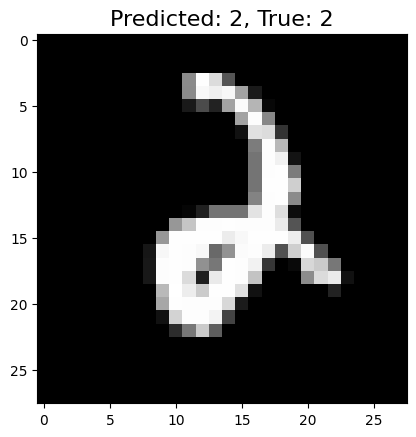

In [31]:
random_idx = np.random.choice(len(test_images))
x_sample = test_images[random_idx]
y_true = np.argmax(test_labels, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

### Q19. Get accuracy and confusion matrix of the model

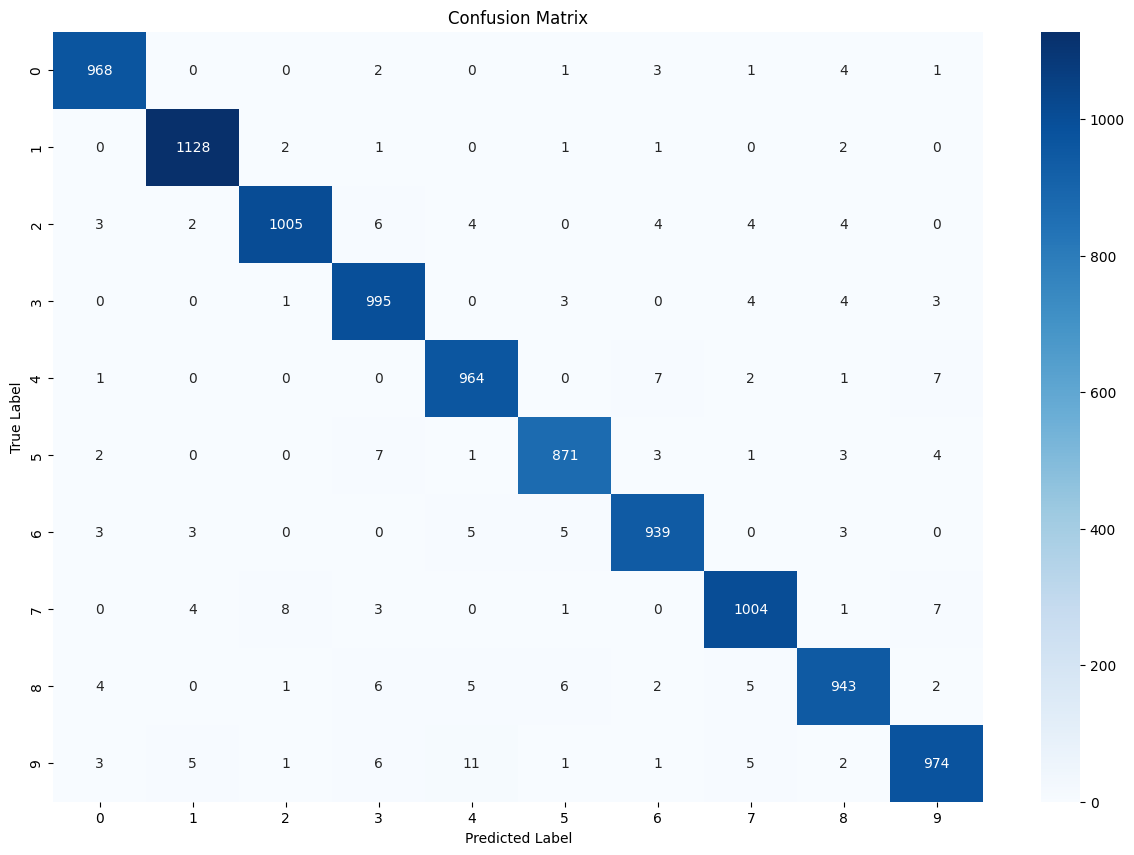

In [32]:

confusion_mtx = confusion_matrix(y_true, y_pred_classes)


fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [33]:

sc = accuracy_score(y_true, y_pred_classes)
print("Accuracy:",sc*100,end="")
print("%")


Accuracy: 97.91%


### Q20. Save the model

In [36]:
model.save_weights('my_model_weights.h5') 